**HW#6**

Submit proof that you were able to successfully follow the above instructions and launch a distributed data parallel training run.

Where proof can be any of:

The contents printed out to your terminal during the run
A path to a logfile containing the output from a run on the ALCF filesystems
A screenshot of:
the text printed out from the run
a graph from the W&B Run
anything that shows that you clearly were able to run the example
url to a W&B Run or W&B Report
etc.

git clone https://github.com/saforem2/wordplay

git clone https://github.com/saforem2/ezpz deps/ezpz


export PBS_O_WORKDIR=$(pwd) && source deps/ezpz/src/ezpz/bin/utils.sh

ezpz_setup_python

python3 -m pip install -e deps/ezpz --require-virtualenv

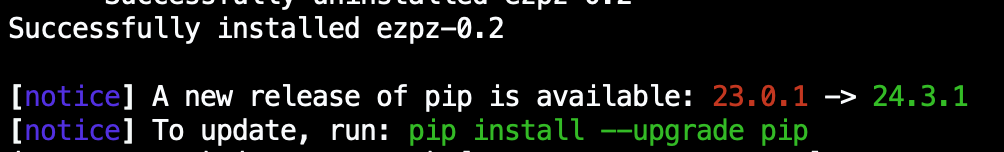

python3 -m pip install -e . --require-virtualenv

I prepared a PBS script (pbs.sh) to submit the job via the scheduler. The script allocates 16 CPUs, 8 MPI processes, 2 threads per process, and 16GB memory. It sets up the environment and runs the ezpz.test_dist script with mpirun.

!/bin/bash
PBS -N ezpz_test_dist

PBS -l select=1:ncpus=16:mpiprocs=8:ompthreads=2:mem=16GB
PBS -m bea

PBS -l walltime=01:00:00

PBS -j oe

PBS -o ${PBS_JOBNAME}.out


cd $PBS_O_WORKDIR

echo "Working on directory: $PWD"

echo "Loaded modules:"

module list

echo "Python version:"

python3 --version

echo "Running ezpz.test_dist with mpirun..."

mpirun -np 8 python3 -m ezpz.test_dist



#Some Results

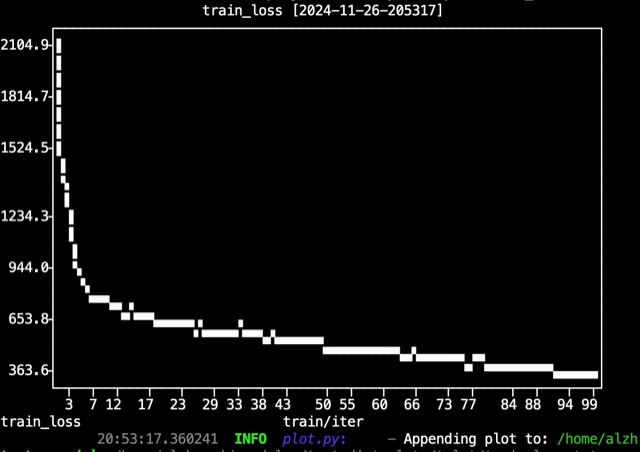

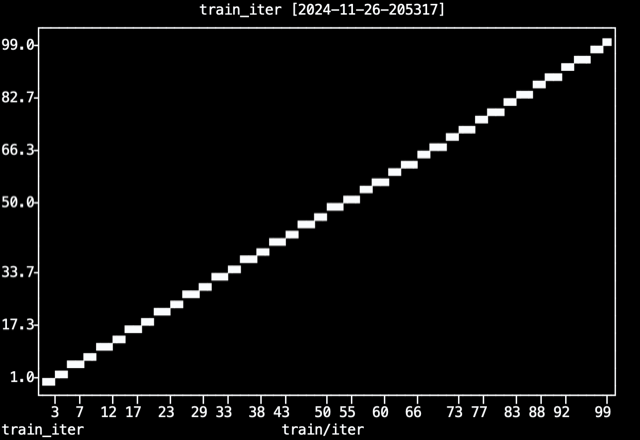

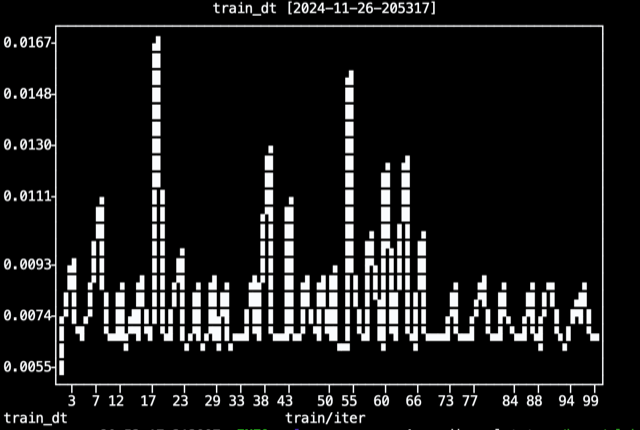